<a href="https://colab.research.google.com/github/tm28823289/CSMML16_ML-traditional-deep-neural-model-comparison/blob/main/CSMML16_ML_traditional_%26_deep_neural_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing the required Python and ML libraries & modules

In [107]:
# Importing generic python modules & libraries for implementing ML models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split # For testing and training splits
from sklearn.model_selection import GridSearchCV # For searching over possible values of hyperparameters
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

# Importing modules & libraries for implementing ML traditional model
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score # For evaluating model accuracy score
from sklearn.model_selection import cross_val_score # For cross validation

# for implementing ML DNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [108]:
print(tf.__version__) # checking the tensorflow version

2.4.1


# 2. Loading the ATLAS data

In [109]:
# loading the data in Pandas DataFrame
atlasLabels = pd.read_csv("ATLAS-labels.csv", header=None)
atlasData = pd.read_csv("ATLAS-data.csv", header=None)

# Also loading the data in NumPy Array
atlas_data = np.loadtxt("ATLAS-data.csv",delimiter=",")
atlas_labels = np.loadtxt("ATLAS-labels.csv",delimiter=",") 

# 3. Exploring and experimenting with the ATLAS data

In [110]:
# quick glance at the data set
atlasData.shape

(10000, 30)

In [111]:
atlasData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,243.128,96.455,158.618,90.253,0.693,56.238,1.581,3.615,13.597,264.586,0.664,1.414,0.000,64.280,-0.084,3.074,42.669,1.867,0.031,72.877,2.121,376.410,3.0,46.248,-0.958,-0.444,42.759,-1.651,-1.445,157.638
1,139.751,74.028,111.619,44.266,2.119,104.723,-0.498,2.533,9.437,168.638,2.126,-1.042,0.619,31.997,1.481,1.614,68.028,-0.056,-2.655,20.147,0.447,252.698,2.0,36.798,0.269,-1.254,31.816,-1.849,0.664,68.614
2,116.217,73.136,59.239,101.850,0.625,85.539,2.979,1.922,28.049,202.636,1.966,0.577,0.000,20.894,-2.359,1.423,41.074,-0.807,0.289,68.144,1.816,271.485,2.0,82.453,2.066,-1.210,58.216,1.442,-2.288,140.669
3,64.544,0.099,28.945,341.418,2.390,358.936,-1.181,0.714,35.293,508.349,3.894,1.010,0.963,20.102,0.446,-2.483,78.270,-0.264,-2.408,243.099,-2.409,470.806,3.0,331.152,-1.693,0.615,41.742,0.697,1.083,409.977
4,32.281,67.393,26.006,29.088,1.330,108.191,-0.362,0.846,48.389,152.087,1.252,-1.084,0.880,28.195,-0.076,2.496,35.312,0.046,1.659,32.186,-1.421,244.220,2.0,48.198,0.949,1.517,40.382,-0.382,-2.029,88.580


In [112]:
# checking the class imbalance
collections.Counter(atlas_labels)

Counter({0.0: 5312, 1.0: 4688})

In [113]:
# checking for any datatype discrepencies
atlas_data.dtype

dtype('float64')

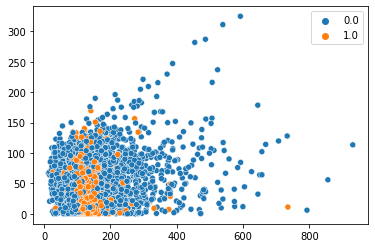

In [114]:
# plotting a scatter plot to see how the classes are distributed
sns.scatterplot(x=atlas_data[:,0], y=atlas_data[:,1], hue=atlas_labels )

# 4. Data preprocessing strategies adopted 

In [115]:
# as a good practice for uniform evaluation doing feature scaling & standardizing using Scikit-Learn functions

# StandarScalar
scaler = StandardScaler()
scaler.fit(atlas_data)
atlas_processed_StdScl = scaler.transform(atlas_data)

# Preprocessing
atlas_processed_PrePro = preprocessing.scale(atlas_data)

# 5. Building ML Traditional Models

> ## 5.1 Supervised: K-Nearest Neighbour

In [130]:
# Creating a copy of data for "the KNN model
KNN_Data = atlas_processed_StdScl
KNN_Labels = atlas_labels

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn_train_values, knn_test_values, knn_train_labels, knn_test_labels = train_test_split(KNN_Data, KNN_Labels, test_size=0.2)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(knn_train_values, knn_train_labels)
    scores = cross_val_score(knn_model, knn_test_values, knn_test_labels, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())   

In [147]:
# creating confusion matrix for KNN model
cmKNN = sklearn.metrics.confusion_matrix(knn_test_labels,knn_model.predict(knn_test_values))
tnKNN, fpKNN, fnKNN, tpKNN = cmKNN.ravel()
precisionKNN = tpKNN / (tpKNN + fpKNN)
recallKNN = tpKNN / (tpKNN + fnKNN)
print("The KNN confusion-matrix is: ")
print(cmKNN)
print("KNN precision score is: ",precisionKNN,"\nKNN recall score is   : ", recallKNN)

The KNN confusion-matrix is: 
[[830 243]
 [237 690]]
KNN precision score is:  0.7395498392282959 
KNN recall score is   :  0.7443365695792881


In [132]:
# Perform GridSearch on the KNN model to identify best hyperparameter
grid = {"n_neighbors":range(1,30)}
model_cv = GridSearchCV(knn_model,grid,cv=10,iid=False)
model_cv.fit(knn_train_values, knn_train_labels)
model_cv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'n_neighbors': 28}

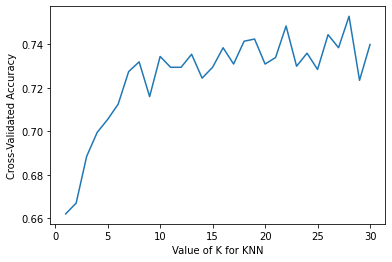

In [133]:
# accuracy plot to see the optimal value for K in KNN
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

> ## 5.2 SVM: Support Vector Machine


In [148]:
# Creating a copy of data for "the SVM model
SVM_Data = atlas_processed_StdScl
SVM_Labels = atlas_labels

In [149]:
svm_train_values, svm_test_values, svm_train_labels,svm_test_labels = train_test_split(SVM_Data, SVM_Labels, test_size=0.2)

In [150]:
# Perform GridSearch on the SVM model to identify best hyperparameter
grid = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'gamma': [1,0.1,0.01,0.001],'C': [0.1, 1, 10, 100]}
model_cv = GridSearchCV(SVM,grid,cv=10,iid=False)
model_cv.fit(X_train_scale, y_train)
model_cv.best_params_

NameError: ignored

# 6. Building Deep Learning approaches

# 7. Experiment results and analysis

# 8. Comparison between Traditional and Deep Learning methods

In [ ]:
# divide dataset into training and test splits
X_train, X_test, y_train, y_test = train_test_split(atlas_data,atlas_labels,test_size=0.2) # splits the dataset into 80% training and 20% testing data